# Script 1

Based on https://www.geekstips.com/battery-life-calculator-sleep-mode/.

This version does a more liberal calculation.

[Github Backup](https://github.com/jmBSU/maskMisc/blob/main/batterylife.ipynb)

---
## Motivation
This was originally on Matlab but to change values and see the results would require you to download it and run it. It was not worth the extra hassle. Thus, it is here instead. 

---
## Warning Popup
Just click "run anyway". For some odd reason when I was copying from my test environment, it thought that it was malicious.
 
---
## Current Values
If this works, this should plot the battery life assuming the following:

* Battery: 2 AAA in Series for 3.0 to 3.2V nominal
  * Rated for 1200 mAh total
* Sleep cycle consumes 18mA
* Wake cycle consumes 30mA
* 2 minute uptime followed by 8 minute sleep
* Calculation includes a derate of 15% on the battery

Hours till battery is dead: 50.00 or 2.08 days


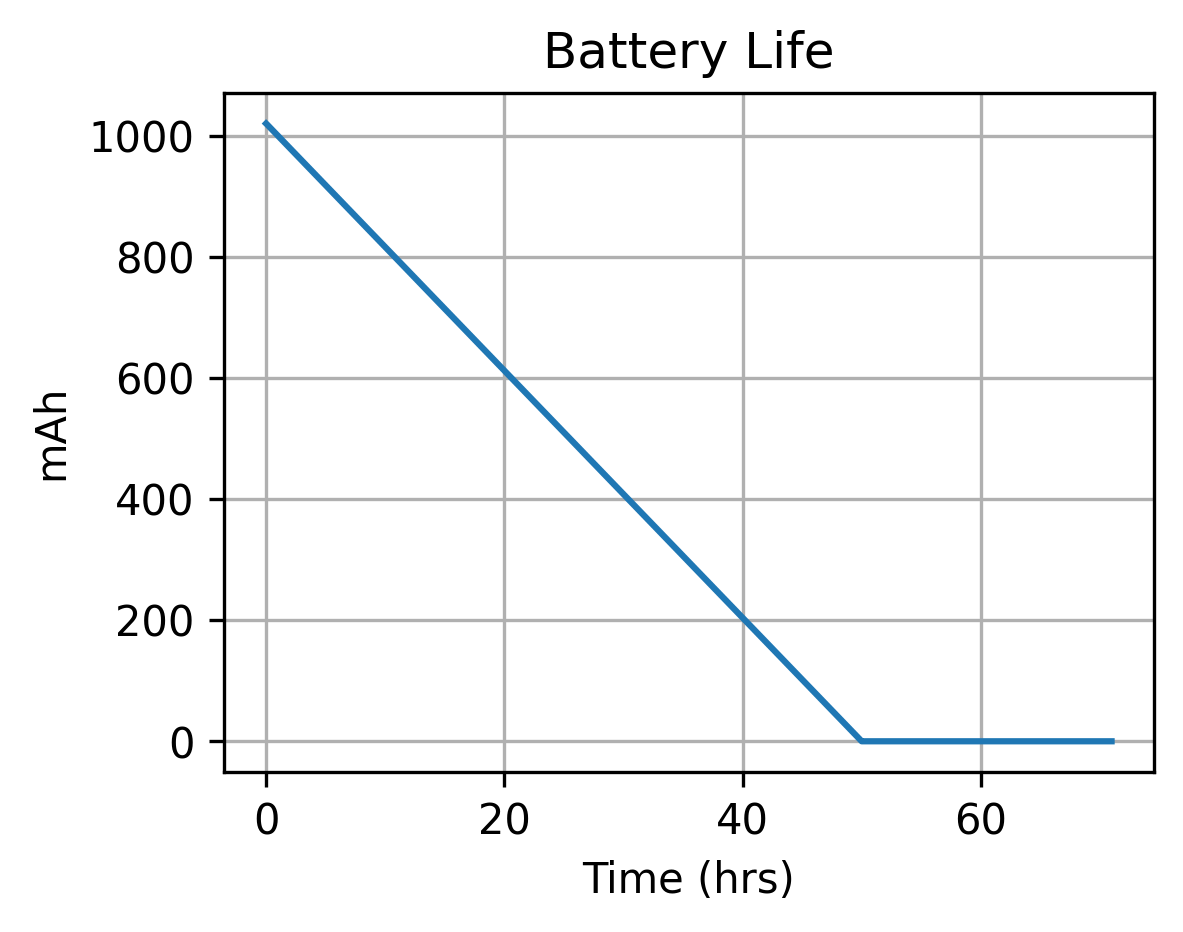

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import sympy as sym

#Batter Capacity in mAh
batteryCap = 1200;

#Power draw in mA
wakePower = 30;
sleepPower = 18;

#wake and sleep time in Minutes
wakeTime = 2; 
sleepTime = 8;


#For loop for 0 to 70 hours
x = [];

for i in range(71*60): 
  x.append(i/60)

#Calculates y for each x manually
yarray = [];

timeCounter = 0;
timeMax = wakeTime + sleepTime;
y = batteryCap * 0.85 * 60;
yarray.append(y/60);

for i in range(71*60): 
  #ignores 1st data entry
  if i != 0:
    #y must be positive - makes all <0 to =0
    if y > 0:
      #Clears internal count
      if timeCounter == timeMax:
        timeCounter = 0;
      #Assumes sleep first - starts decrementing per minute
      if timeCounter < sleepTime: 
        y -= sleepPower;
        yarray.append(y/60);
      #This is for when it is awake - aka the remainder of timeMax
      elif timeCounter < timeMax:
        y -= wakePower;
        yarray.append(y/60); 
      timeCounter+=1;
    else:
      yarray.append(0)

#Makes image big and good lookin - 4x3 at 300dpi
figure(figsize=(4,3), dpi=300) 

#Plots a linear function of battery 
plt.plot(x,yarray);
plt.xlabel("Time (hrs)");
plt.ylabel("mAh");
plt.title("Battery Life");
plt.grid();

#Finds the first 0, the index indicates the minute it is dead
hourDead = yarray.index(0)/60;
dayDead = hourDead/24;

print("Hours till battery is dead:","%0.2f" % hourDead,"or", "%0.2f" % dayDead, "days");


# Script 2 (Old)

This bottom script was the initial version where it plots the battery life via a linear equation. The main issue with this code was that it was scaled by the hour. This meant that uptime and sleeptime must add up and be repeatable to the hour. 

i.e:
* 2 min up + 8 min sleep = 10 min total
  * 10 min * 6 runs in an hour = 60 minutes

Thus 12 min up in a hour, and 48 min sleep in an hour.

This converts to 0.2 uptime in an hour and 0.8 sleep in an hour.

These decimals are fed into the code and plotted.

Hours till battery is dead: 50.00 or 2.08 days


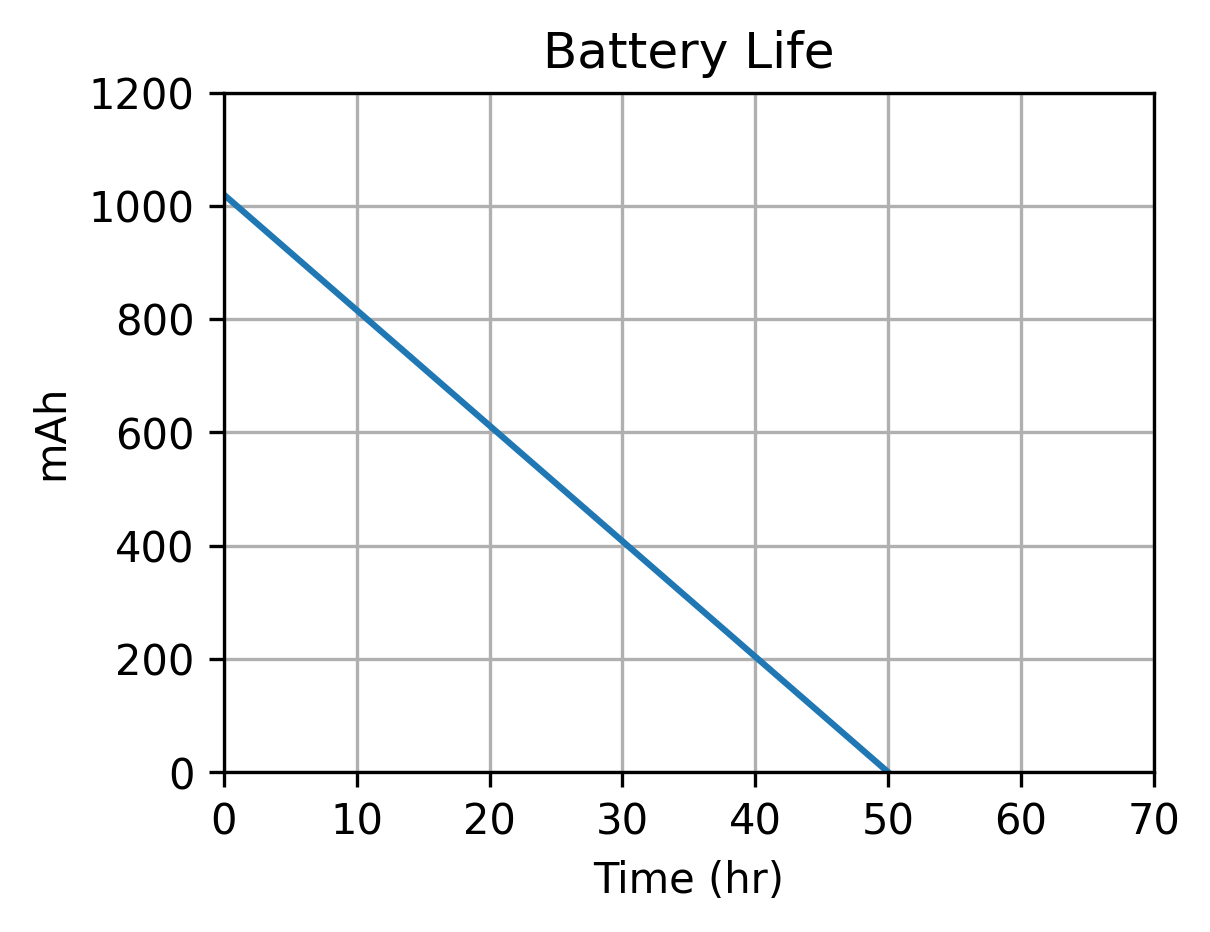

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import sympy as sym

#Batter Capacity in mAh
batteryCap = 1200;

#Power draw in mA
wakePower = 30;
sleepPower = 18;

#Fraction on a per hour basis
wakeTime = 0.2; 
sleepTime = 0.8;

x = [];

#For loop for 0 to 70 hours 
for i in range(71): 
  x.append(i)

#Makes image big and good lookin - 4x3 at 300dpi
figure(figsize=(4,3), dpi=300)

#Plots a linear function of battery life
x = np.asarray(x);
plt.plot(x,batteryCap*0.85- sleepPower*sleepTime*x-wakePower*wakeTime*x);
plt.xlabel("Time (hr)");
plt.ylabel("mAh");
plt.title("Battery Life");
plt.grid();
plt.axis([0,70,0,1200]);

#Solves the hour and day battery is dead.
sym.var('hour');
eqn = sym.Eq(0,batteryCap*0.85- sleepPower*sleepTime*hour-wakePower*wakeTime*hour);
hourDead = sym.solve(eqn,hour);
dayDead = hourDead[0] / 24;
print("Hours till battery is dead:","%0.2f" % hourDead[0],"or", "%0.2f" % dayDead, "days");

